In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

np.random.seed(1)
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
train_X, train_Y, test_X, test_Y = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [7]:
print("Train X shape",train_X.shape)
print("Train Y shape",train_Y.shape)
print("Test X shape",test_X.shape)
print("Test Y shape",test_Y.shape)

Train X shape (55000, 28, 28, 1)
Train Y shape (55000, 10)
Test X shape (10000, 28, 28, 1)
Test Y shape (10000, 10)


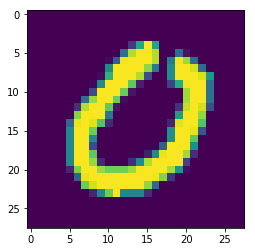

In [8]:
index = 7
plt.imshow(train_X[7].reshape(28,28))

In [9]:
number_features = train_X.shape[1]
number_output_classes = train_Y.shape[1]

In [10]:
def weight_init(shape):
    return tf.Variable(tf.random_normal(shape))

In [14]:
def model(X, W1, W2, W3, W4,W5, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1,1,1,1],padding="SAME")) #(?, 28, 28, 32)
    l1 = tf.nn.max_pool(l1a, ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME") #(?, 14, 14, 32)
    l1 = tf.nn.dropout(l1,p_keep_conv)
    
    l2a = tf.nn.relu(tf.nn.conv2d(l1, W2, strides=[1,1,1,1],padding="SAME"))
    l2 = tf.nn.max_pool(l2a, ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    l2 = tf.nn.dropout(l2,p_keep_conv)
    
    l3a = tf.nn.relu(tf.nn.conv2d(l2, W3, strides=[1,1,1,1],padding="SAME"))
    l3 = tf.nn.max_pool(l3a, ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
    l3 = tf.reshape(l3, [-1, W4.get_shape().as_list()[0]])
    l3 = tf.nn.dropout(l3,p_keep_conv)
    
    l4 = tf.nn.relu(tf.matmul(l3,W4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    
    y_pred = tf.matmul(l4,W5)
    
    return y_pred

In [17]:
p_keep_conv = tf.placeholder(tf.float32)
p_keep_hidden = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32,[None, 28, 28, 1])
Y = tf.placeholder(tf.float32,[None,10])

In [19]:
W1 = weight_init([3, 3, 1, 32])
W2 = weight_init([3, 3, 32, 64])
W3 = weight_init([3, 3, 64, 128])
W4 = weight_init([128*4*4, 625])
W5 = weight_init([625, 10])

In [21]:
y_hat = model(X,W1,W2,W3,W4,W5,p_keep_input,p_keep_hidden)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat,labels=Y))
train_step = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_step = tf.argmax(y_hat, 1)

In [23]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for i in range(10):
        batch_x, batch_y = mnist.train.next_batch(100)
        batch_x = batch_x.reshape(-1,28,28,1)
        sess.run(train_step,feed_dict={X:batch_x, Y:batch_y,p_keep_input:0.8,p_keep_hidden:0.5})
        print(i,"th iteration, accuracy is ",np.mean(np.argmax(test_Y, axis=1) ==
                         sess.run(predict_step, feed_dict={X: test_X,
                                                           p_keep_input:1.0,
                                                           p_keep_hidden:1.0})))

0 th iteration, accuracy is  0.1589
1 th iteration, accuracy is  0.1629
2 th iteration, accuracy is  0.1847
3 th iteration, accuracy is  0.2454
4 th iteration, accuracy is  0.2288
5 th iteration, accuracy is  0.2141
6 th iteration, accuracy is  0.231
7 th iteration, accuracy is  0.2223
8 th iteration, accuracy is  0.25
9 th iteration, accuracy is  0.2411
